<a href="https://colab.research.google.com/github/AtaruOhto/google-colab-sandbox/blob/master/xgboost_sandbox_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

train_data = pd.read_csv("./train.csv")

y = train_data.y.values
train_data = train_data.drop(["id", "y", "contact", "job"], axis=1)




train_data["default"] = train_data["default"].map(dict(no=0, yes=1))
train_data["housing"] = train_data["housing"].map(dict(no=0, yes=1))
train_data["loan"] = train_data["loan"].map(dict(no=0, yes=1))
train_data["month"] = train_data["month"].map({"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12})

X = pd.get_dummies(train_data ,columns=["marital", "poutcome", "education"])
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, shuffle=True) 
X


,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,31,0,12294,1,0,21,11,101,3,498,0,0,1,0,0,1,0,0,0,1,0,0
1,29,0,43027,0,0,22,8,158,2,702,0,0,0,1,0,0,0,1,0,0,1,0
2,35,0,12252,1,0,11,11,351,1,826,0,0,1,0,1,0,0,0,0,0,1,0
3,31,0,99121,1,1,16,5,658,2,120,0,0,1,0,1,0,0,0,0,1,0,0
4,48,0,42005,1,0,3,4,177,1,273,0,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,0,26661,1,0,27,5,345,4,425,0,0,1,0,0,0,0,1,0,1,0,0
27096,35,0,42150,1,0,27,5,121,1,719,0,0,1,0,0,0,0,1,0,1,0,0
27097,35,0,34531,0,0,28,6,177,2,121,0,0,1,0,0,0,0,1,0,0,0,1
27098,30,0,99621,1,0,27,5,121,1,100,0,0,0,1,0,0,0,1,0,1,0,0


In [3]:
# # グリッドサーチ
# from sklearn.model_selection import StratifiedKFold, GridSearchCV


# params = {
#     "eta": [0.1, 0.2, 0.3],
#     "gamma": [0, 0.1],
#     "n_estimators": [10, 100],
#     "max_depth": [2, 4, 6, 8],
#     "min_child_weigh": [1, 2],
#     "nthread": [2]
# }


# model = xgb.XGBClassifier()  
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# clf = GridSearchCV(estimator=model, param_grid=params,   
#                     cv=skf, scoring="roc_auc", n_jobs=1, verbose=3)  
# clf.fit(train_x, train_y)  

# グリッドサーチ
from sklearn.model_selection import StratifiedKFold, GridSearchCV


params = {
    "eta": [0.06],
    "gamma": [0],
    "n_estimators": [200],
    "max_depth": [2, 4],
    "min_child_weigh": [1, 2],
    "nthread": [2]
}


model = xgb.XGBClassifier()  
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
clf = GridSearchCV(estimator=model, param_grid=params,   
                    cv=skf, scoring="roc_auc", n_jobs=1, verbose=3)  
clf.fit(train_x, train_y)  

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] eta=0.06, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=200, nthread=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  eta=0.06, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=200, nthread=2, score=0.853, total=   1.4s
[CV] eta=0.06, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=200, nthread=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  eta=0.06, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=200, nthread=2, score=0.842, total=   1.4s
[CV] eta=0.06, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=200, nthread=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV]  eta=0.06, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=200, nthread=2, score=0.843, total=   1.4s
[CV] eta=0.06, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=200, nthread=2 
[CV]  eta=0.06, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=200, nthread=2, score=0.816, total=   1.4s
[CV] eta=0.06, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=200, nthread=2 
[CV]  eta=0.06, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=200, nthread=2, score=0.834, total=   1.4s
[CV] eta=0.06, gamma=0, max_depth=2, min_child_weigh=2, n_estimators=200, nthread=2 
[CV]  eta=0.06, gamma=0, max_depth=2, min_child_weigh=2, n_estimators=200, nthread=2, score=0.853, total=   1.4s
[CV] eta=0.06, gamma=0, max_depth=2, min_child_weigh=2, n_estimators=200, nthread=2 
[CV]  eta=0.06, gamma=0, max_depth=2, min_child_weigh=2, n_estimators=200, nthread=2, score=0.842, total=   1.4s
[CV] eta=0.06, gamma=0, max_depth=2, min_child_weigh=2, n_estimators=200, nthread=2 
[CV]  eta=

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   38.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=1,
             param_grid={'eta': [0.06], 'gamma': [0], 'max_depth': [2, 4],
                         'min_child_

In [4]:
print("Best score: %.4f" % (clf.best_score_))  
print(clf.best_params_) 
model = clf.best_estimator_
model 

Best score: 0.8373
{'eta': 0.06, 'gamma': 0, 'max_depth': 2, 'min_child_weigh': 1, 'n_estimators': 200, 'nthread': 2}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.06, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weigh=1, min_child_weight=1, missing=None,
              n_estimators=200, n_jobs=1, nthread=2,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [7]:
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(test_x, label=test_y)

param = {
    'max_depth': 4, 
    'gamma': 0,
    'eta': 0.06, 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'min_child_weigh': 2, 
    'n_estimators': 200, 
    'nthread': 2
}

evallist = [(dvalid, 'eval'), (dtrain, 'train')]  
num_round = 430
bst = xgb.train(param, dtrain, num_round, evallist) 

[0]	eval-auc:0.792844	train-auc:0.778792
[1]	eval-auc:0.794858	train-auc:0.783417
[2]	eval-auc:0.797876	train-auc:0.787514
[3]	eval-auc:0.79809	train-auc:0.786063
[4]	eval-auc:0.798066	train-auc:0.787323
[5]	eval-auc:0.797709	train-auc:0.787066
[6]	eval-auc:0.804179	train-auc:0.793616
[7]	eval-auc:0.803803	train-auc:0.793945
[8]	eval-auc:0.805072	train-auc:0.796256
[9]	eval-auc:0.8038	train-auc:0.793943
[10]	eval-auc:0.805437	train-auc:0.795245
[11]	eval-auc:0.805063	train-auc:0.795579
[12]	eval-auc:0.808819	train-auc:0.798001
[13]	eval-auc:0.80811	train-auc:0.795526
[14]	eval-auc:0.808334	train-auc:0.795588
[15]	eval-auc:0.80848	train-auc:0.795193
[16]	eval-auc:0.8083	train-auc:0.795255
[17]	eval-auc:0.808571	train-auc:0.796176
[18]	eval-auc:0.811283	train-auc:0.799379
[19]	eval-auc:0.8111	train-auc:0.799142
[20]	eval-auc:0.814613	train-auc:0.80129
[21]	eval-auc:0.814808	train-auc:0.802162
[22]	eval-auc:0.812779	train-auc:0.801349
[23]	eval-auc:0.813508	train-auc:0.803382
[24]	eval-au

In [8]:
print('Best Score:{0:.4f}, Iteratin:{1:d}, Ntree_Limit:{2:d}'.format(  
     bst.best_score, bst.best_iteration, bst.best_ntree_limit)) 

AttributeError: ignored

In [9]:
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(test_x, label=test_y)

print(sorted(bst.get_score(), key=bst.get_score().get))
bst.get_score()

# contact
# job
# poutcome
# loan



['education_unknown', 'education_tertiary', 'marital_divorced', 'poutcome_other', 'education_primary', 'education_secondary', 'marital_married', 'poutcome_success', 'loan', 'marital_single', 'poutcome_unknown', 'housing', 'poutcome_failure', 'previous', 'campaign', 'month', 'day', 'age', 'duration', 'pdays', 'balance']


{'age': 652,
 'balance': 1022,
 'campaign': 199,
 'day': 579,
 'duration': 692,
 'education_primary': 50,
 'education_secondary': 63,
 'education_tertiary': 31,
 'education_unknown': 12,
 'housing': 103,
 'loan': 68,
 'marital_divorced': 34,
 'marital_married': 65,
 'marital_single': 86,
 'month': 527,
 'pdays': 983,
 'poutcome_failure': 116,
 'poutcome_other': 46,
 'poutcome_success': 68,
 'poutcome_unknown': 93,
 'previous': 185}

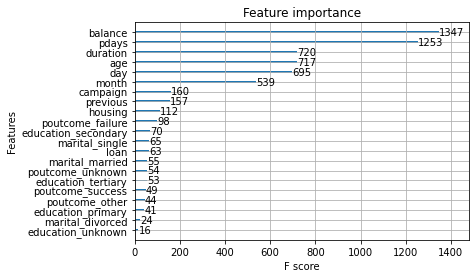

In [ ]:
xgb.plot_importance(bst)  

0.8556309593346799


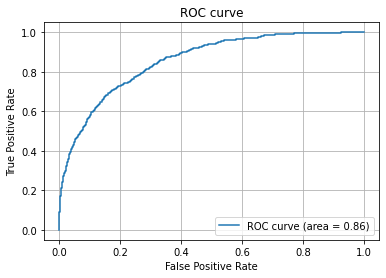

In [10]:
y_pred = bst.predict(dvalid)
# dtrain = xgb.DMatrix(train_x, label=train_y)
# dvalid = xgb.DMatrix(test_x, label=test_y)
# test_x 

# model.save_model('model.txt')

# y_pred = model.predict(test_x)


# # train_y, test_y
# # train_x, test_x,

# AUC (Area Under the Curve) を計算する
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)


import matplotlib.pyplot as plt
%matplotlib inline
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

